In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

# Basic NLP

## Natural Language Processing - NLP

NLP is processing natual language - free text and speech. We can use free text in predictive modelling, in fact it is a quickly developing field.

Technologies such as speech recognition, automatic translation, and computer speech are all based on the concpets that we'll cover here. 

The premise of NLP is that we take a piece of text and process it to transform into a format that we can process. In our case here we'll take free text and convert it into a set of features - we can then use those features to make predictions for our target, just like always!

### Spam Filtering

For an example we'll build a spam filter. The dataset here has two columns - one is a text message, the other is a human assigned label of spam or ham. We want to be able to detect the spam messages and filter them out. The only feature we have to be able to do so is the message itself...

In [2]:
#Load Data
df = pd.read_csv("data/spam.csv", encoding="ISO-8859-1")
df.drop(columns={"Unnamed: 2", "Unnamed: 3", "Unnamed: 4"}, inplace=True)
df.rename(columns={"v1":"target", "v2":"text"}, inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Tokenization

Feeding in random text messages to a predictive algorithm is unlikely to be effective. We need to transform our random text into a more consistent data structure, that we can feed into an alogorithm. This process is called Tokenizing. 

Tokenizing takes a sentance and transforms it into a list of tolkens - the words in the sentence. 

#### Very Simple Tokenizer

 We can visualize the process of tokenization pretty easily by looking at an example of a dead simple tokenizer. The function below will tokenize a sentence in a basic way - it will chop apart the sentence into words, and add them to a list. This example uses regex to do basic filtering to only extract words that are 2+ letters. 

<b>Note:</b> This example of a tokenizer (and this stuff in general) is a very basic version, and the field of NLP is developing quickly. More advanced text processing is better able to capture more of the structure of the language, and more of the meaning. We are stripping lots of "hidden" meaning out to make it manageable, more advanced NLP tries to understand as much of that meaning as possible. 

In [3]:
#Really simple tokenizer
def tokenize(sentence):
    tokens = []
    for token in re.findall(r"\b\w\w+\b", sentence):
        tokens.append(token.lower())
    return tokens

#### Tokenize a Thing...

In [4]:
tolk = tokenize(df["text"][5])
print(df["text"][5])
tolk

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv


['freemsg',
 'hey',
 'there',
 'darling',
 'it',
 'been',
 'week',
 'now',
 'and',
 'no',
 'word',
 'back',
 'like',
 'some',
 'fun',
 'you',
 'up',
 'for',
 'it',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chgs',
 'to',
 'send',
 '50',
 'to',
 'rcv']

#### Tokenize Results

Tokenizing transforms our random text into something more orderly and able to be processed - in this case a list of words. This tokenization process is the basis of all other processing. 

We can take this set of tokens and do some further processing. For this we'll use something called a Vectorizer. The vectorizer will do the simple act of tokenizing, and build the actual data structure that we need as a feature set. 

#### Vocabulary

The set of all our tokens, or all words used in our dataset is called the vocabulary. 

## Vectorizers

In sklearn we have some libraries called vectorizors - they can do much of the text processing for us. There are two that we'll touch on - CountVectorizer and Tf-idf Vectorizer. 

Each of these does the bulk of the prep for us:
<ul>
<li> Tokenize the strings. 
<li> Count the occurances of each. 
<li> Weight the relative importance of different words. In different ways...
</ul> 

<b> Each takes in a dataset of text strings and outputs a set of features that we can use for our predictions. </b>

### Count Vectorization

Count vectorization is the most simple process we can use to make our text into a set of features. The count vectorization will split apart our data into tokens, count them up, and produce an array where:
<ul>
<li> Each column is a word. 
<li> Each row is an input piece of text (e.g. an email)
<li> Each cell is a count of the number of times that word appears. 
</ul>

This is our Bag of Words - now instead of having a sentence as an input, we have something like a one-hot matrix of words used. We can picture this by printing it out (Note: there's a little reconstruction below to put it into a nice dataframe format)

#### Count Vectorizer Benefits and Drawbacks

The main benefit of the count vectorizer is the simplicity and speed - all it needs to do is count. It has the downside of being quite simple in the analysis of the language - we don't extract which words are more or less important, we just get a count. For things that are written similarly this can be effective - I have used this for a simple tool to detect cheaters on tests - people copying from each other or a common source like Chegg tend to have the same words repeated in their answer. 

#### Sparse Features

This process generally produces a sparse matrix - most words are not in most sentences, so most scores in the final matrix are 0. For this we'll keep it simple and use algorithms that deal with sparse matrices (e.g. SVC). Later on we'll look at ways to reduce dimensionality.

Some algorithms may throw an error if you feed them a sparse matrix. 

In [5]:
vec_cv = CountVectorizer(max_features=150)
tmp = vec_cv.fit_transform(df["text"])
tok_cols = vec_cv.get_feature_names()
tok_df = pd.DataFrame(tmp.toarray(), columns=tok_cols)
print("original:", df["text"].shape)
print("vectorized:", tmp.shape)
tok_df.sample(10)

original: (5572,)
vectorized: (5572, 150)


,about,after,all,already,am,amp,an,and,any,are,...,will,with,won,work,www,yeah,yes,you,your,ì_
2142,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4111,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1541,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
844,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3749,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,3,1,0
779,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2828,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011,2,1,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,5,0,0
2698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1399,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


That has the number of features limited to 150, if we imposed no limits we'd get something way messier...

In [6]:
vec_cv2 = CountVectorizer()
tmp2 = vec_cv2.fit_transform(df["text"])
tok_cols2 = vec_cv2.get_feature_names()
tok_df2 = pd.DataFrame(tmp2.toarray(), columns=tok_cols2)
print("original:", df["text"].shape)
print("vectorized:", tmp2.shape)
tok_df2.sample(10)

original: (5572,)
vectorized: (5572, 8672)


,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,ó_,û_,û_thanks,ûªm,ûªt,ûªve,ûï,ûïharry,ûò,ûówell
4226,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2425,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2869,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1541,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5054,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3889,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2677,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4319,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3404,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF Vectorization

TF-IDF vectorization is similar to the count vectorizor, but it does some calculations to determine the importance of the word. The calculations are based on the name:
<ul>
<li> Term Frequency - the number of times a word appears in a document divided by the total number of words in the document.
<li> Inverse Document Frequency - the log of the total number of documents divided by the number of documents that contain the word.
<li> Note: each input phrase (row in dataset) is a document. 
</ul>

![TF-IDF](images/tfidf.png "TF-IDF" )

The final result is the two multiplied by each other, hence TF-IDF. 

#### TF-IDF Importance

TF-IDF weights the importance of each word to give lower scores to words that are:
<ul>
<li> Too frequent - words that repeat constantly are likely to not be helpful in differentiating sentences. 
<li> Too rare - words that almost never occur don't exist often enough to establish a pattern. 
</ul>

TF-IDF tends to give us a better ability to evaluate work importance, but it is still not able to extract relationships between words nor generate more sophisticated meaning of the words. For that we need to use more sophisticated processing libraries, such as word2vec that we'll look at later on. 

In [7]:
#TF-IDF
vec_tf = TfidfVectorizer(max_features=150)
tmp = vec_tf.fit_transform(df["text"])
tok_cols = vec_tf.get_feature_names()
tok_df = pd.DataFrame(tmp.toarray(), columns=tok_cols)
print("original:", df["text"].shape)
print("vectorized:", tmp.shape)
tok_df.sample(10)

original: (5572,)
vectorized: (5572, 150)


,about,after,all,already,am,amp,an,and,any,are,...,will,with,won,work,www,yeah,yes,you,your,ì_
3753,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.475936,0.0
5060,0.0,0.0,0.0,0.0,0.419309,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.222199,0.000000,0.0
1189,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.258123,0.000000,0.0
1397,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0
3563,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.569173,0.0,0.0,0.0,0.0,0.00000,0.340624,0.490802,0.0
3196,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.263391,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.336716,0.000000,0.0
4234,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.186622,0.0,0.0,0.0,0.0,0.24673,0.223369,0.000000,0.0
1644,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0
1635,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.362274,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.138576,0.000000,0.0
2031,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0


#### Vectorization Parameters

There are several parameters that can be pretty important when doing vectorization:
<ul>
<li> Max Features - as seen above. Limits how many feature columns are produced. This will cap it to the N most frequent words instead of every word seen. 
<li> strip_accents - remove random characters such as accents. 
<li> lowercase - covert all to lower case. This is helpful as case matters in code, but doesn't matter for us. 
<li> stop_words - filter out stop words. More on this later. 
<li> tokenizer - we can specify our own tokenizer function, where we can layer in more processing. More on this later. 
<li> ngram_range - how "big" can tokens be? I.e. can you have a 2 word token - e.g. "downhill skiing". 
</ul>

### Predictive Model with Text

In [8]:
from sklearn.svm import SVC
model_svc = SVC()

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1209
        spam       0.98      0.82      0.89       184

    accuracy                           0.97      1393
   macro avg       0.98      0.91      0.94      1393
weighted avg       0.97      0.97      0.97      1393



<AxesSubplot:>

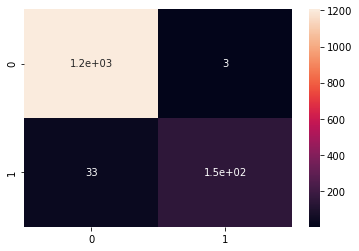

In [9]:
vec_tf = TfidfVectorizer(max_features=150)
vec_cv = CountVectorizer(max_features=150)

y = df["target"]
X = df["text"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

pipe1 = Pipeline([ 
                    #("vect", vec_cv),
                    ("vect", vec_tf),
                    ("model", model_svc)
])

params = ["vec_cv"]

pipe1.fit(X_train, y_train.ravel())
preds = pipe1.predict(X_test)

print(classification_report(y_test, preds))
sns.heatmap(confusion_matrix(y_test, preds), annot=True)


#### Results

Our predictions are pretty good!

## More Elaborate Language

In the example above we've done a "base" level of modelling - we transform the free text into something that we can process (the bag of words), and we can make predictions from it much like we would with any other one-hot encoded data. This process works fine, and it does deliver some pretty accurate results on our test data. 

To create NLP models that are more functional we can add some layers to our processing of the text to improve our understanding of the nuances of our text. Some things we can do are:
<ul>
<li> Remove Stop Words - common words like "it", "a", "the" are normally not all that useful in predicting the meaning, we can filter these out. 
<li> Stemming - coverting words down to their "stem". E.g. "reasoning" to "reason"
<li> Lemmatization - similar to stemming, but tries to identify the correct stem contextually. E.g. "Operating systems" probably shouldn't become "operate" and "system"
</ul>

In general, stemming increases recall while harming precision. Lemmatization has similar impacts, but tends to be less aggressive, so the effects are smaller. The specific results are highly variable depending on the exact text that is used. Something that uses specific variations of words to mean specific things (e.g. science) is more likely to get no benefit or be negatively impacted - e.g. "conditonally" used in the context of a "conditionally approved loan" is probably not well represented by changing it to "condition". 

### NLTK

NLTK provides a bunch of language processing stuff that we can use such as stop words and tokenizers. We'll leverage it here to make custom tokenizers to incorporate some of those features above. 

The "for package" part there downloads the wordsets to your computer. NLTK has these prebuilt libraries of data that allow for the functions to do the stop words, stemming, and lemmatization. 

In [10]:
import nltk

for package in ['stopwords','punkt','wordnet']:
    nltk.download(package)
    
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

stop_words    = set(stopwords.words('english')) 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\soniy\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\soniy\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\soniy\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


### Customized Tokenizers

The vecorization libraries in sklearn allow you do specify the function to use to do tokenization. We can use this to include other processing that we'd like as part of the process, such as removing stop words or stemming. 

The tokenizer functions below can, potentially, contain anything you'd like. As long as the call function returns a list of tokens, it should work. 

Note: if you look up examples, these functions will often be written into one lines, I broke them out so they're hopefully easier to read. 

#### Stop Words

First, we will try to make a stop word tokenizer. If something is a stop word, we shall leave it out. As noted above, we can build this into the vectorizer, so why do it? This will allow for customizing the stopwords used - some applications may have a different usage of words, so changing stopwords makes sense. 

This is also the most simple example we can try :)

In [11]:
class swTokenizer(object):
    def __init__(self, stop_words):
        self.stop_words = stop_words
    def __call__(self, doc):
        tokens = word_tokenize(doc)
        filtered_tok = []
        for tok in tokens:
            if tok not in stop_words:
                filtered_tok.append(tok)
        return filtered_tok

#### Stemming and Lemmatization

Stemming and lemmatization are similar - they both aim to break words down to their "root". For example, the word "shoes" probably has the same meaning as the word "shoe" for our purposes. 

##### Stemming

Stemming is the most simple, it just removes common prefixes and suffixes to extract the root of the word. 

##### Lemmatization

Lemmatization is slightly more sophisticated, it attempts to find the semantic root, called the lemma, of a word using a search of a dictionary (we provide one from NLTK). For example, the lemma of "better" is "good".

In [12]:
class stemTokenizer(object):
    def __init__(self, stop_words):
        self.stop_words = stop_words
        from nltk.stem import SnowballStemmer
        self.stemmer = SnowballStemmer(language='english')
    def __call__(self, doc):
        tokens = word_tokenize(doc)
        filtered_tok = []
        for tok in tokens:
            if tok not in stop_words:
                filtered_tok.append(self.stemmer.stem(tok))
        return filtered_tok

In [13]:
class lemmaTokenizer(object):
    def __init__(self, stop_words):
        self.stop_words = stop_words
        from nltk.stem import WordNetLemmatizer
        self.lemmatizer = WordNetLemmatizer()
    def __call__(self, doc):
        tokens = word_tokenize(doc)
        filtered_tok = []
        for tok in tokens:
            if tok not in stop_words:
                filtered_tok.append(self.lemmatizer.lemmatize(tok))
        return filtered_tok

### Predictions with More Processing and Grid Search

We can try to see which processing setup works best. 

Pipeline(steps=[('vect',
                 TfidfVectorizer(max_features=1000, norm='l1',
                                 tokenizer=<__main__.stemTokenizer object at 0x0000023B88346B20>)),
                ('model', SVC())])
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1215
        spam       0.99      0.83      0.91       178

    accuracy                           0.98      1393
   macro avg       0.98      0.92      0.95      1393
weighted avg       0.98      0.98      0.98      1393



<AxesSubplot:>

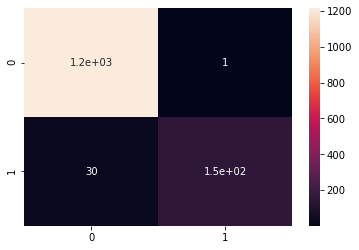

In [14]:
vec_tf = TfidfVectorizer()

y = df["target"]
X = df["text"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

pipe2 = Pipeline([ 
                    #("vect", vec_cv),
                    ("vect", vec_tf),
                    ("model", model_svc)
])

params = {"vect__max_features":[100,500,1000,1500,2000],
            "vect__tokenizer":(swTokenizer(stop_words), stemTokenizer(stop_words), lemmaTokenizer(stop_words) ),
            "vect__norm":["l1","l2"]
            }

grid = GridSearchCV(estimator  = pipe2, 
                               param_grid = params, 
                               scoring    = "balanced_accuracy",
                               cv         = 5,
                               n_jobs     =-1)

grid.fit(X_train, y_train.ravel())
best = grid.best_estimator_
preds = best.predict(X_test)
print(best)
print(classification_report(y_test, preds))
sns.heatmap(confusion_matrix(y_test, preds), annot=True)

## Example

Categorize the following newsgroups. The data are posts from different newgroup boards. Try to categorize the data in either the atheism or religion groups. 

In [15]:
from sklearn.datasets import fetch_20newsgroups
remove = ("headers", "footers", "quotes")
categories = ["alt.atheism", "talk.religion.misc"]

data_train = fetch_20newsgroups(
    subset="train", categories=categories, shuffle=True, random_state=42, remove=remove)

data_test = fetch_20newsgroups(
    subset="test", categories=categories, shuffle=True, random_state=42, remove=remove)


In [17]:
data_test.target

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,

In [ ]:
#data_test.data

In [28]:
X_train3 = data_train.data
y_train3 = data_train.target
X_test3 = data_test.data
y_test3 = data_test.target
#X_train3


In [29]:
print("Test data (x, y): ", len(X_test3), len(y_test3))
print("Train data (x, y): ", len(X_train3), len(y_train3))

Test data (x, y):  570 570
Train data (x, y):  857 857


In [30]:
tf_vec3 = TfidfVectorizer(strip_accents="unicode")
cv_vec3 = CountVectorizer(strip_accents="unicode")

Pipeline(steps=[('vect',
                 TfidfVectorizer(max_features=1000, norm='l1',
                                 strip_accents='unicode',
                                 tokenizer=<__main__.stemTokenizer object at 0x0000023BA9FF3A90>)),
                ('model', RandomForestClassifier())])
              precision    recall  f1-score   support

           0       0.66      0.77      0.71       319
           1       0.64      0.50      0.56       251

    accuracy                           0.65       570
   macro avg       0.65      0.64      0.64       570
weighted avg       0.65      0.65      0.65       570



<AxesSubplot:>

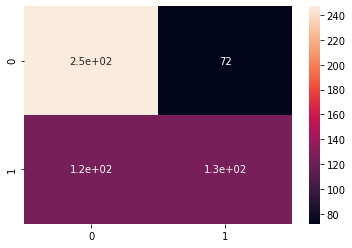

In [35]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

# pipeline
pipe3 = Pipeline([
                    ("vect", tf_vec3),
                    ("model", model)
])


# grid search
params = {"vect__max_features":[100,500,1000,1500,2000],
            "vect__tokenizer":(swTokenizer(stop_words), stemTokenizer(stop_words), lemmaTokenizer(stop_words) ),
            "vect__norm":["l1","l2"],
            "vect__ngram_range":[(1,1),(1,2),(1,3),(2,3)]
            }

grid3 = GridSearchCV(estimator  = pipe3, 
                               param_grid = params, 
                               scoring    = "balanced_accuracy",
                               cv         = 3,
                               n_jobs     =-1)

# results


grid3.fit(X_train3, y_train3)
best3 = grid3.best_estimator_
preds3 = best3.predict(X_test3)
print(best3)
print(classification_report(y_test3, preds3))
sns.heatmap(confusion_matrix(y_test3, preds3), annot=True)



Pipeline(steps=[('vect',
                 TfidfVectorizer(max_features=2500,
                                 tokenizer=<__main__.lemmaTokenizer object at 0x0000023BA1AADB20>)),
                ('model', SVC())])
              precision    recall  f1-score   support

           0       0.66      0.80      0.72       319
           1       0.65      0.47      0.55       251

    accuracy                           0.66       570
   macro avg       0.66      0.64      0.64       570
weighted avg       0.66      0.66      0.65       570



<AxesSubplot:>

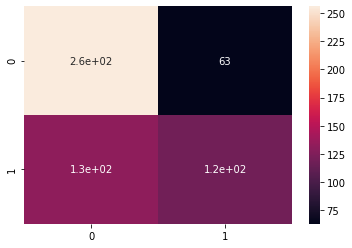

In [25]:
# Create Model
vec_tf3 = TfidfVectorizer()
model_svc3 = SVC()

pipe3 = Pipeline([ 
                    #("vect", vec_cv),
                    ("vect", vec_tf3),
                    ("model", model_svc3)
])

params3 = {"vect__max_features":[100,500,1000,1500,2000,2500,3000],
            "vect__tokenizer":(swTokenizer(stop_words), stemTokenizer(stop_words), lemmaTokenizer(stop_words) ),
            "vect__norm":["l1","l2"]
            }

grid3 = GridSearchCV(estimator  = pipe3, 
                               param_grid = params3, 
                               scoring    = "balanced_accuracy",
                               cv         = 5,
                               n_jobs     =-1)

grid3.fit(X_train3, y_train3)
best3 = grid3.best_estimator_
preds3 = best3.predict(X_test3)
print(best3)
print(classification_report(y_test3, preds3))
sns.heatmap(confusion_matrix(y_test3, preds3), annot=True)